In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [6]:
np.random.seed(10)
X=np.array(range(30))
y=np.array([i*3+np.random.randint(-20,20) for i in X])
X_outlier=X.copy()
y_outlier=y.copy()
y_outlier[12]=107
y_outlier[4]=95
X.reshape(-1,1).shape

(30, 1)

<AxesSubplot:title={'center':'with outliers'}>

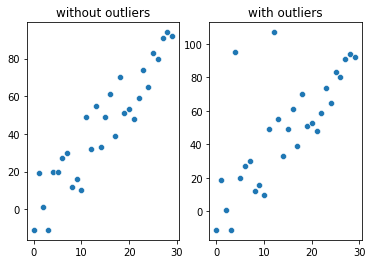

In [7]:
plt.subplot(1,2,1)
plt.title('without outliers')
sns.scatterplot(X,y)
plt.subplot(1,2,2)
plt.title('with outliers')
sns.scatterplot(X_outlier,y_outlier)

In [8]:
class Stats:

    def __init__(self,X,y,model):
        self.data=X
        self.target=y
        self.model=model
        self._dft=X.shape[0]-1
        self._dfe=X.shape[0]-X.shape[1]-1

    def sse(self):
        squared_error=(self.target -self.model.predict(self.data))**2
        return np.sum(squared_error)

    def sst(self):
        avg_y=np.mean(self.target)
        squared_error = (self.target-avg_y)**2
        return np.sum(squared_error)

    def r_squared(self):
        return 1- (self.sse()/self.sst())

    def adj_r_squared(self):
        return 1-(self.sse()/self._dfe)/(self.sst()/self._dft)
        

In [9]:
def pretty_print_stats(stats_obj):
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [10]:
lr=LinearRegression()
X,y=(X.reshape(-1,1),y.reshape(-1,1))
x_train,x_test,y_train,y_test =train_test_split(X,y,test_size=0.24)
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
X_outlier,y_outlier=(X_outlier.reshape(-1,1),y_outlier.reshape(-1,1))
xo_train,xo_test,yo_train,yo_test =train_test_split(X_outlier,y_outlier,test_size=0.24)
lr.fit(xo_train,yo_train)

LinearRegression()

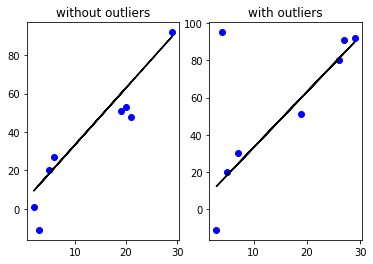

In [12]:
y_pred = lr.predict(x_test) 
yo_pred = lr.predict(xo_test) 
plt.subplot(1,2,1)
plt.title('without outliers')
plt.scatter(x_test, y_test, color ='b') 
plt.plot(x_test, y_pred, color ='k') 
plt.subplot(1,2,2)
plt.title('with outliers')
plt.scatter(xo_test, yo_test, color ='b') 
plt.plot(xo_test, yo_pred, color ='k') 

In [13]:
stats=Stats(x_train,y_train,lr)
stats_o=Stats(xo_train,yo_train,lr)

In [14]:
print('-------------without outliers-----------------')
pretty_print_stats(stats)
print('---------------with outliers----------------')
pretty_print_stats(stats_o)

-------------without outliers-----------------
sse:     2746.4568
sst:     17729.2727
r^2:     0.8451
adj_r^2: 0.8373
---------------with outliers----------------
sse:     7717.2056
sst:     19594.9545
r^2:     0.6062
adj_r^2: 0.5865


<h4>we observe huge drop in R^2 & adj_R^2 values</h4><br>
<p>This is because of outliers
Investigate the outlier(s). Do NOT assume these cases are just bad data. Some outliers are true examples while others are data entry errors. You need to know which it is before proceeding.
Consider imputing or removing outliers.</p>
